CENSUS INCOME

Project Description


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. 

Objective-

The prediction task is to determine whether a person makes over $50K a year.


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [90]:
#Reading data set
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [91]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#Checking random samples
data.sample(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
478,23,Private,197904,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,35,United-States,<=50K
32027,44,Local-gov,203761,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
2972,36,Private,187046,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
4274,44,Private,67671,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
32378,25,Private,273792,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,37,United-States,<=50K
24361,29,Private,53271,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
29304,32,Private,130040,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
8750,27,Self-emp-not-inc,442612,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,65,United-States,>50K
14930,46,Self-emp-inc,62546,Doctorate,16,Separated,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
26817,25,Private,202033,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
#Checking shape of datsa
data.shape

(32560, 15)

In [6]:
#Checking data type and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Columns like Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Hours_per_week, Income and Native_country have object type data and the remaining columns either have int data. 
No columns have null values as well

In [7]:
#Confirming of nulls for each variable
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
#Let's check unique values
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

We can see that there are missing values present in the form of '?' in this column

In [11]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [12]:
data['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [13]:
data['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [14]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

For this column as well,  there are missing values present in the form of '?'.

In [15]:
data['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [16]:
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [17]:
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [18]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

For this column as well,  there are missing values present in the form of '?'.

In [20]:
data['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [21]:
data['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [22]:
data['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [40]:
data['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

Observation-

There are 3 variables- Native_country, Occupation and Workclass that have missing values present in the form of '?', this needs to be treated later.

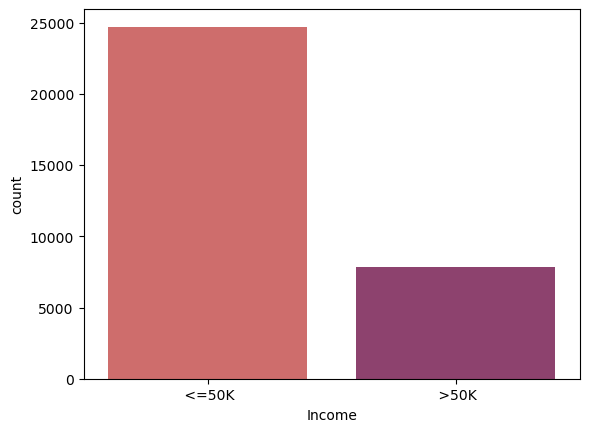

In [23]:
#Let's check distribution of income-
sns.countplot(x='Income', data=data, palette='flare')
plt.show()

The count of number of population with <=50K income is are way higher than number of population with less than 50K income. This shows imbalance in the data that needs to be handled later.

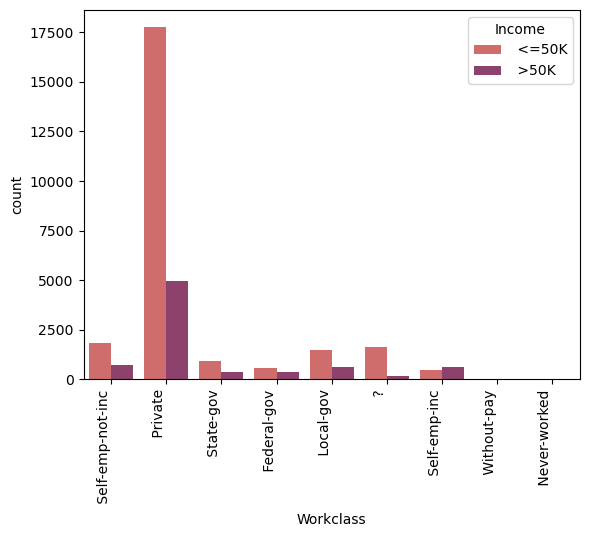

In [26]:
#Let's check count of population with different income work class wise
sns.countplot(x='Workclass', hue='Income', data=data, palette='flare')
plt.xticks(rotation=90, ha='right')
plt.show()

Employees working in the private sector have the highest earning. This work class comprises of highest number of population with more than 50K salary. Without-Pay and Never-worked show no earning at all.

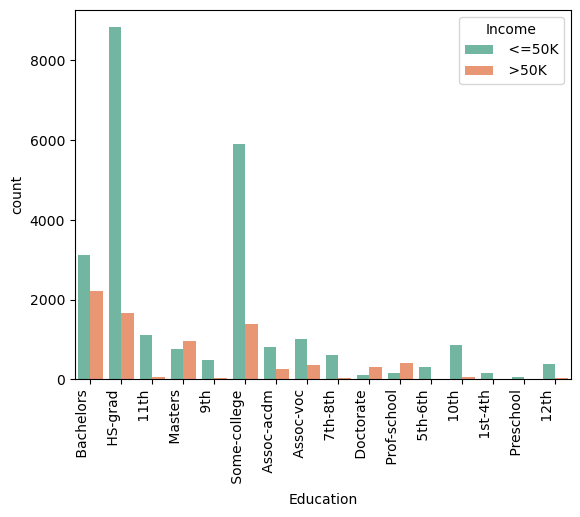

In [27]:
#Let's check count of population with different income on the basis of education
sns.countplot(x='Education', hue='Income', data=data, palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.show()

Population that has HS-grad, Bachelors and have studied from Some-college seem to be the highest contributor to elites earning above 50K. Surprisingly, population with Masters and Doctorate degree don't seem to earn that well.

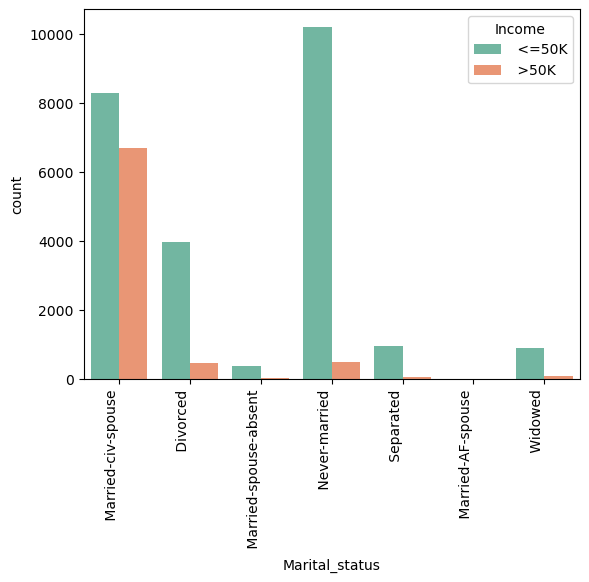

In [28]:
#Let's check count of population with different income on the basis of marital status
sns.countplot(x='Marital_status', hue='Income', data=data, palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.show()

Elites who are not maaried are highest contributors of high income class. Population with Married-civ-spouse also contributes well in both population <=50K and >50K income. Divorced class has higher population with <=50K income. Married-spouse-absent doesn't contribute much in income.

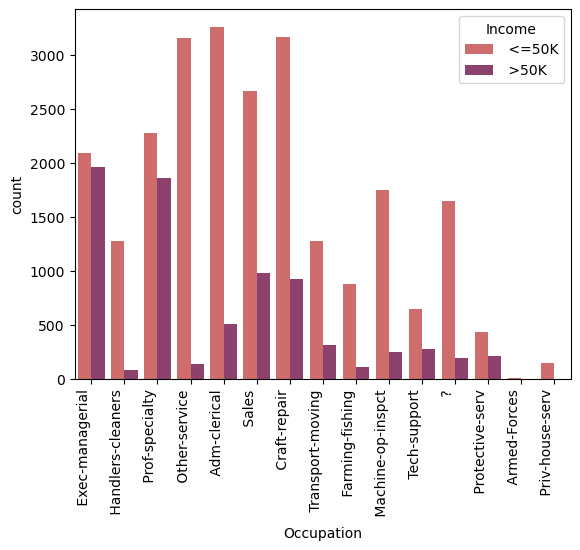

In [31]:
#Let's check count of population with different income on the basis of Occupation
sns.countplot(x='Occupation', hue='Income', data=data, palette='flare')
plt.xticks(rotation=90, ha='right')
plt.show()

Population with Craft-repair, Sales,Adm-clerical, Other-services Prof-speciality and Exec-managerial have higher income as compared to population with other occupation. Armed-Forces is the least earning occupation class.

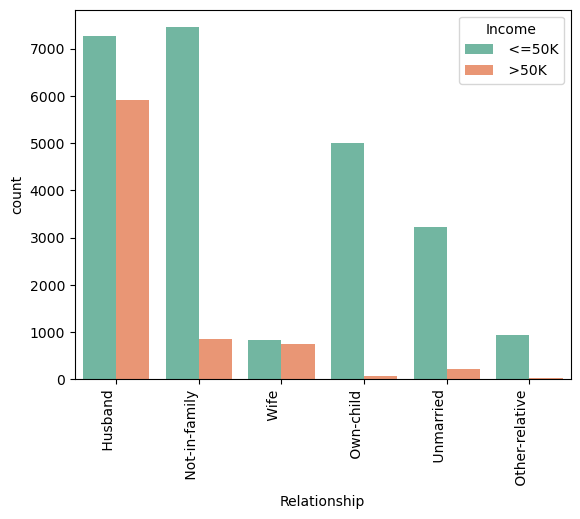

In [32]:
#Let's check count of population with different income on the basis of Relationship
sns.countplot(x='Relationship', hue='Income', data=data, palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.show()

Population that does not have a family yet contributes the highest to <=50K earning elites. Population with Husband contributes well both in elites with <=50K and >50K income.

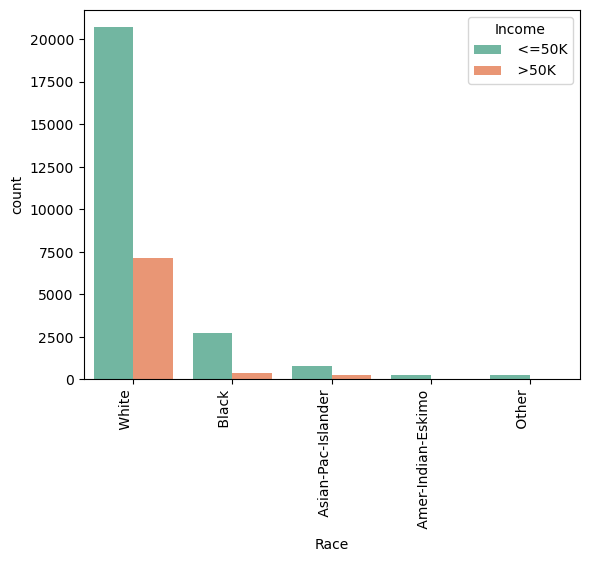

In [33]:
#Let's check count of population with different income on the basis of Race
sns.countplot(x='Race', hue='Income', data=data, palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.show()

White people are highest earning race with most num ber of people with <=50K income.

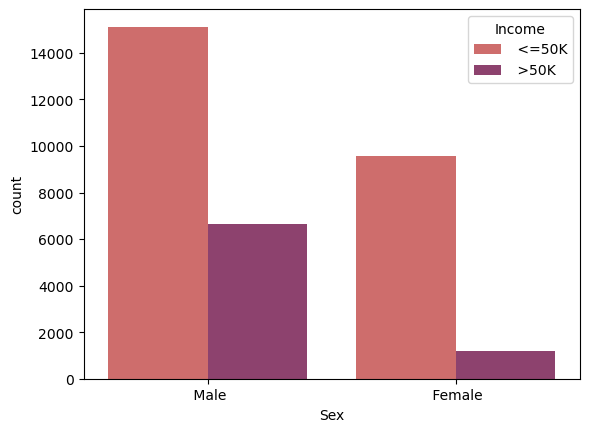

In [34]:
#Let's check count of population with different income on the basis of Sex
sns.countplot(x='Sex', hue='Income', data=data, palette='flare')
plt.show()

Males contribute more to class with <=50K income. Also, data comprises of population with higher number of males than females. Among females, class with >50K income is comparatively lesser.

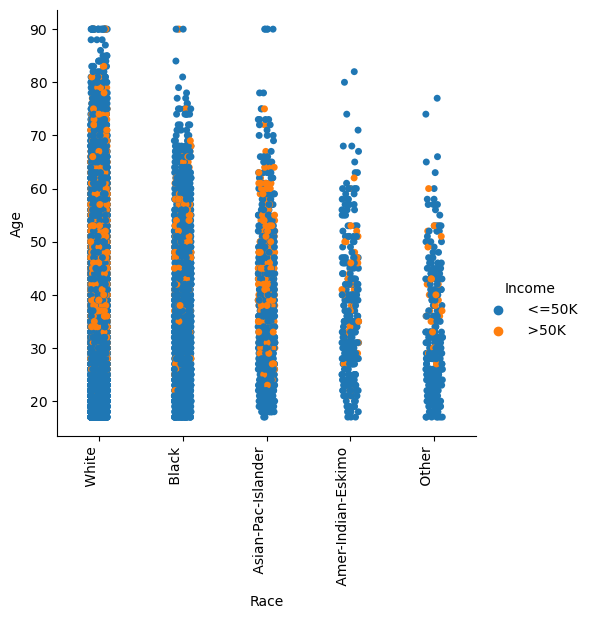

In [36]:
# Checking Agewise race and income
sns.catplot(x='Race', y='Age', data=data, hue='Income')
plt.xticks(rotation=90, ha='right')
plt.show()

In [92]:
#Handelling Nulls 
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=' ?', strategy="most_frequent")

In [93]:
List=['Native_country','Occupation','Workclass']

In [94]:
for i in List:
    data[i]=SI.fit_transform(data[i].values.reshape(-1,1))

In [95]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [96]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [97]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

All the null values have been treated now.

In [98]:
#Converting Object data type into numericals-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [99]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [100]:
object_data=['Workclass','Education','Marital_status','Occupation','Relationship',
     'Race','Sex','Native_country','Income']

In [101]:
for i in object_data:
    data[i]=le.fit_transform(data[i])

In [102]:
data.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

All the variables are now have numerical values

In [61]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [57]:
#Let's check more details about the data
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Observations-

1. There are no null values present in any of the variables.

2. The standard deviation range of 0.42 to range as high as 7385.40 implies that the scale of distribution has a lot of variation.

3. Few variables like Age, Capital_gain, Capital_loss etc and Hours_per_week have high difference in 75% and max which clearly indicated the presence of outliers.

4. Few variables seem to have skewness.

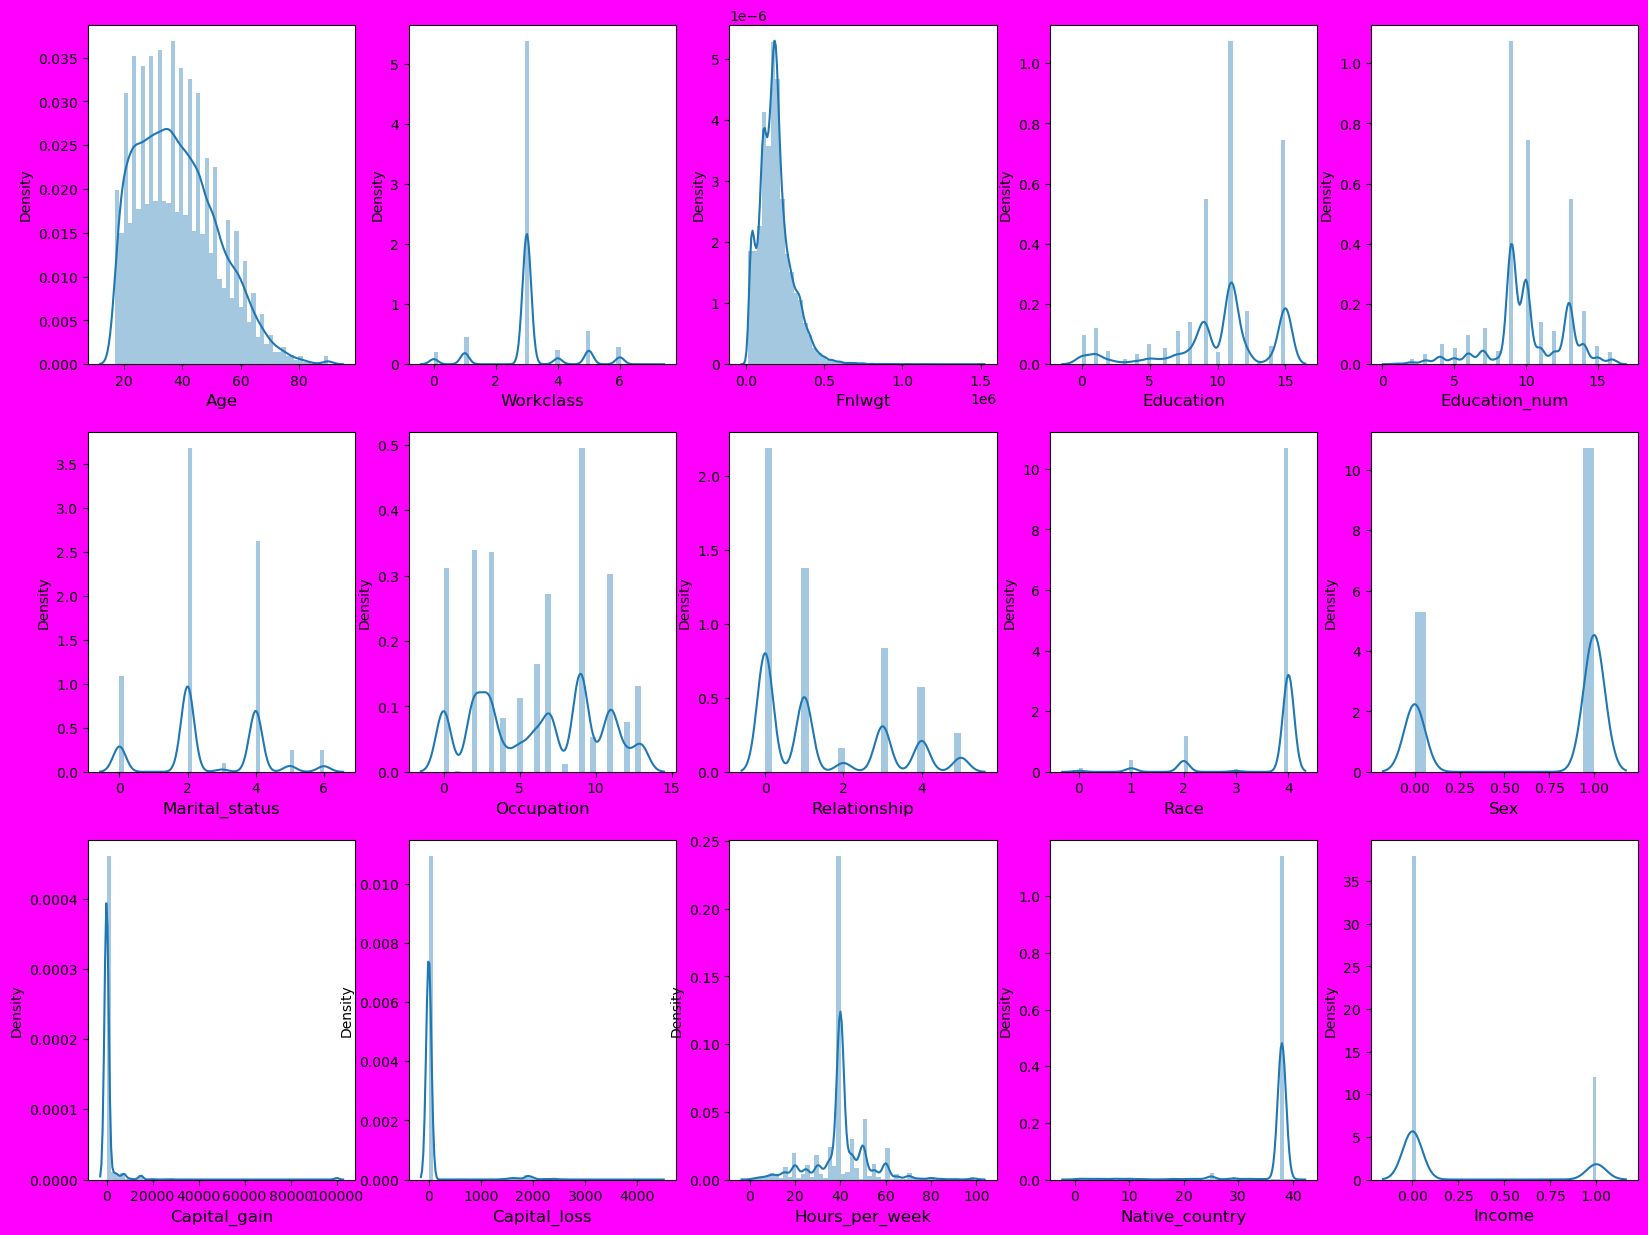

In [58]:
#Let's check distribution of data-
plt.figure(figsize=(20,15), facecolor='magenta')
plotnumber=1

for column in data:
    if plotnumber<=15:
        ax=plt.subplot(3,5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()

A lot of variables like Capital_gain, Capital_loss, Native_country, Race etc, seem to have high skewness.

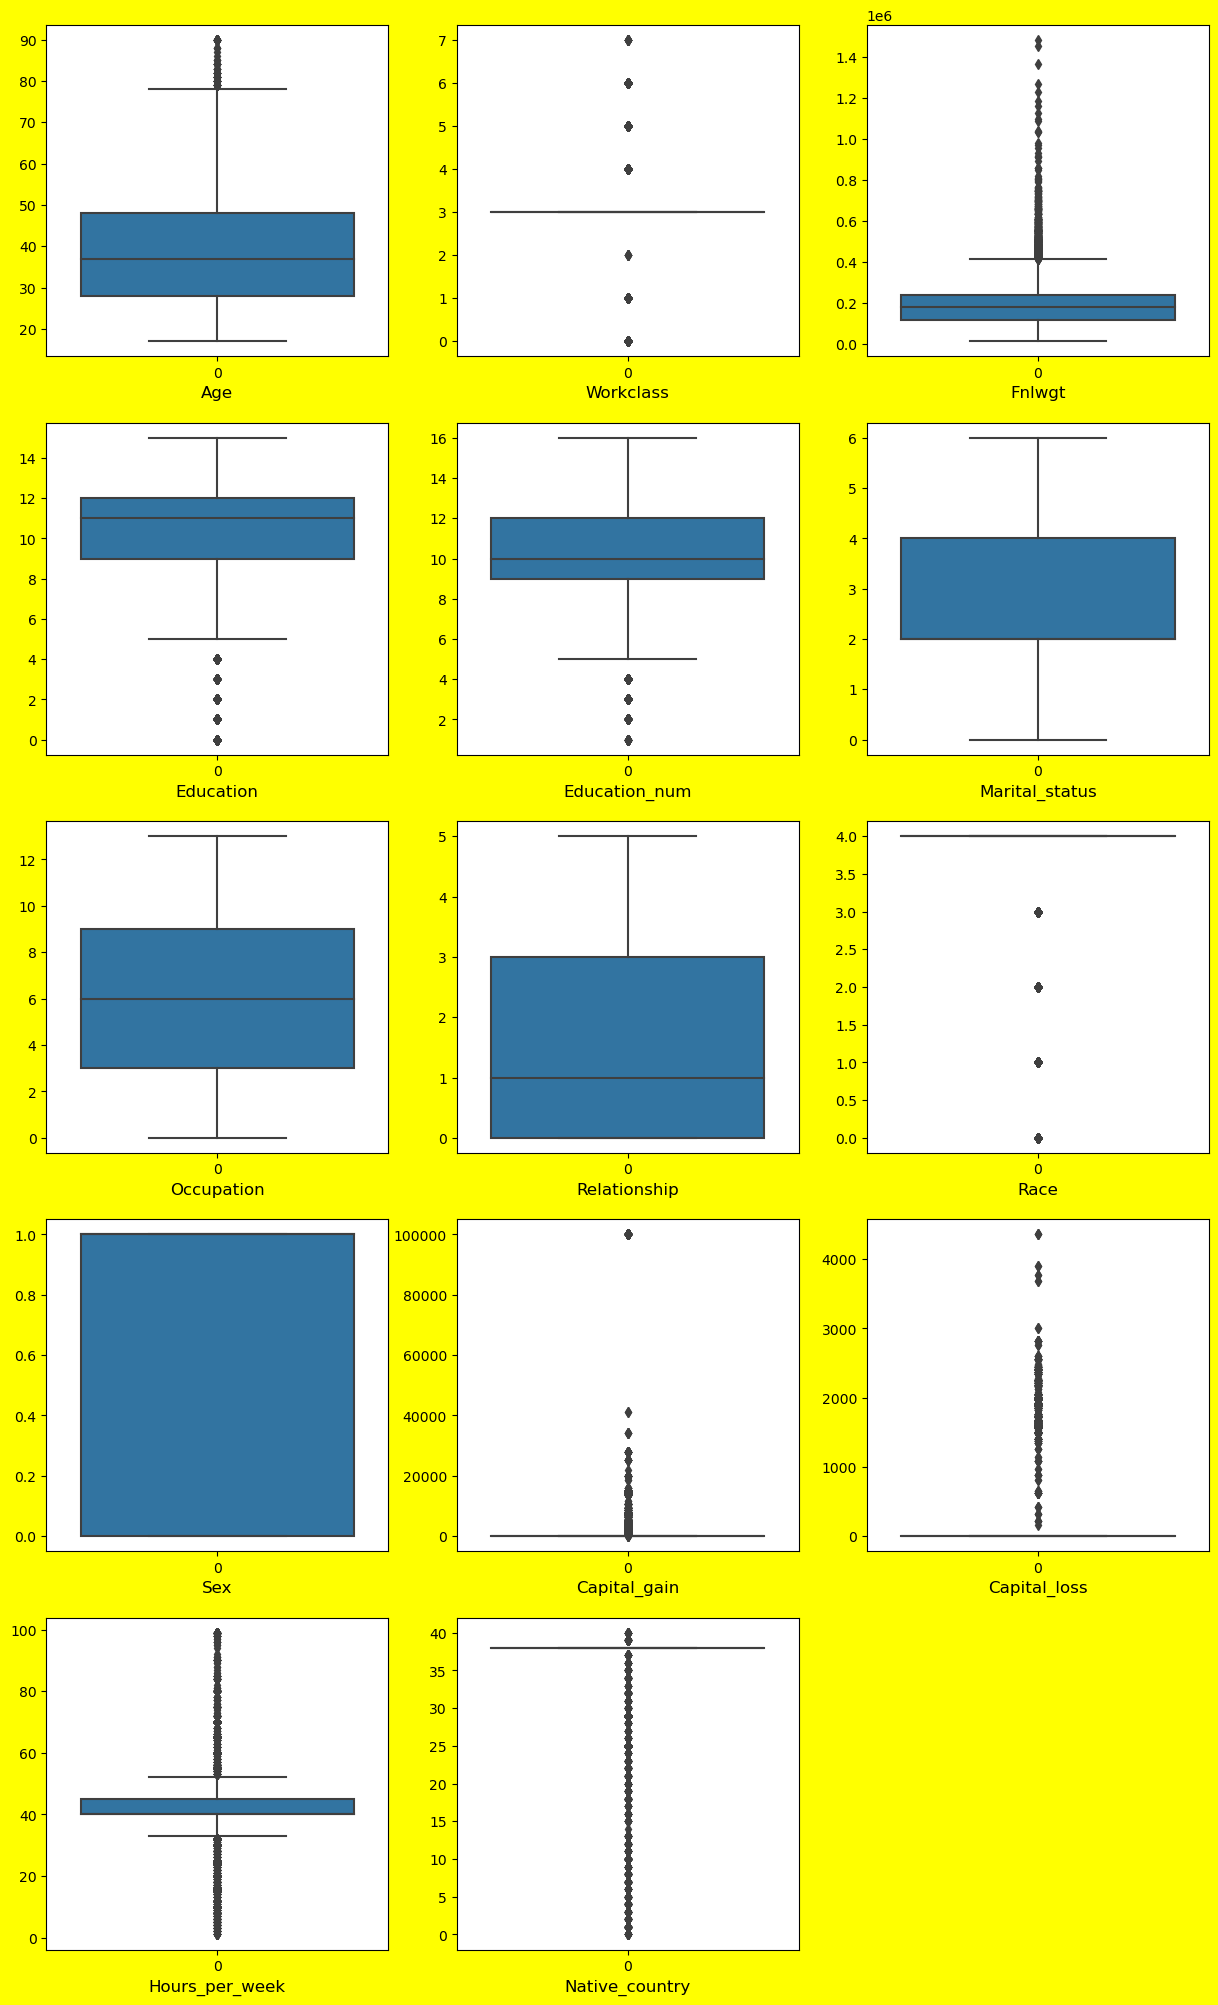

In [59]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<15:
        ax=plt.subplot(5,3, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()    

Hours_per_week, Native_country, Capital_gain, Capital_loss, Fnlwgt and Race have high number of outliers present. Workclass, Education, Education-num and Age also have outliers.

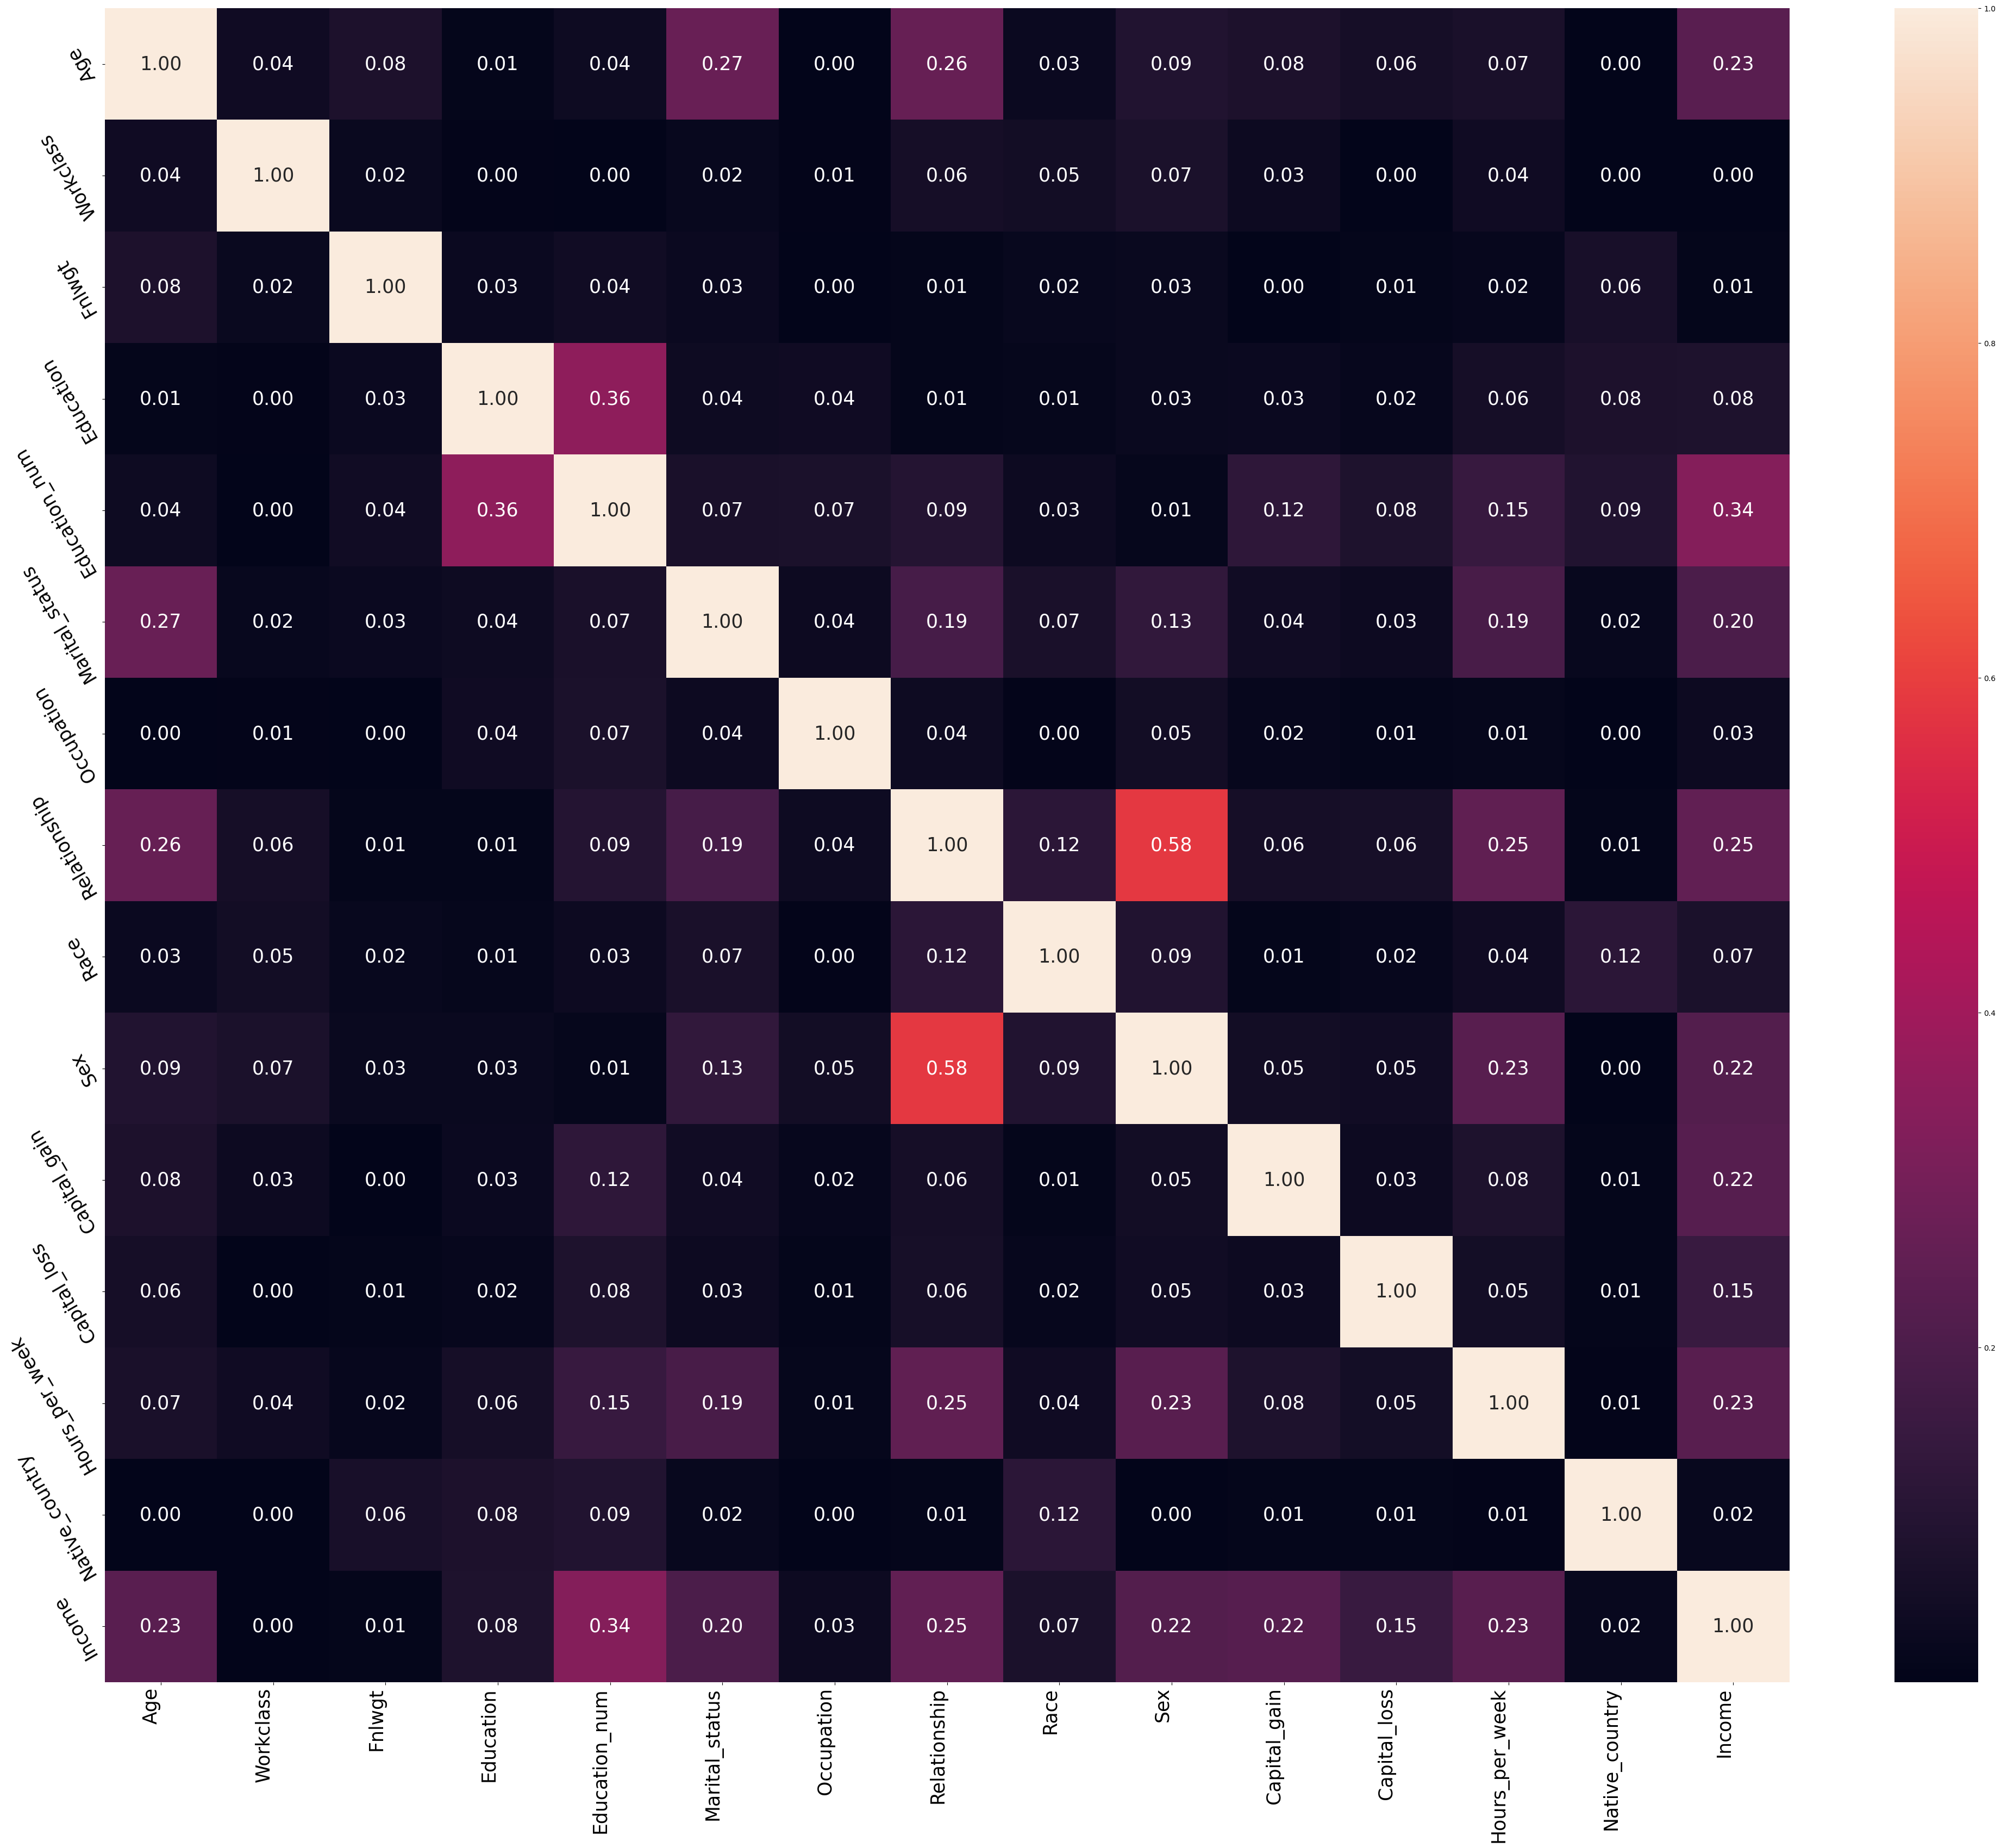

In [60]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(50,40))
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':25})
plt.xticks(rotation=90, ha='right', size=25)
plt.yticks(rotation=120, ha='right', size=25)
plt.show()

Observations-

1. Relationship and Sex seem slighltly correlated however, we don't see multicolinearity issue here.

2. Race and , Occupation, Fnlwgt, Native_country and Workclass are least contributors to determination of income.

3. Education_num and Relationship are highly correlated with Income.

In [62]:
#Let's check the impact of each feature on the label(Income)
data.drop('Income', axis=1).corrwith(data.Income)

Age               0.234039
Workclass         0.002739
Fnlwgt           -0.009481
Education         0.079311
Education_num     0.335182
Marital_status   -0.199295
Occupation        0.034599
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Native_country    0.023063
dtype: float64

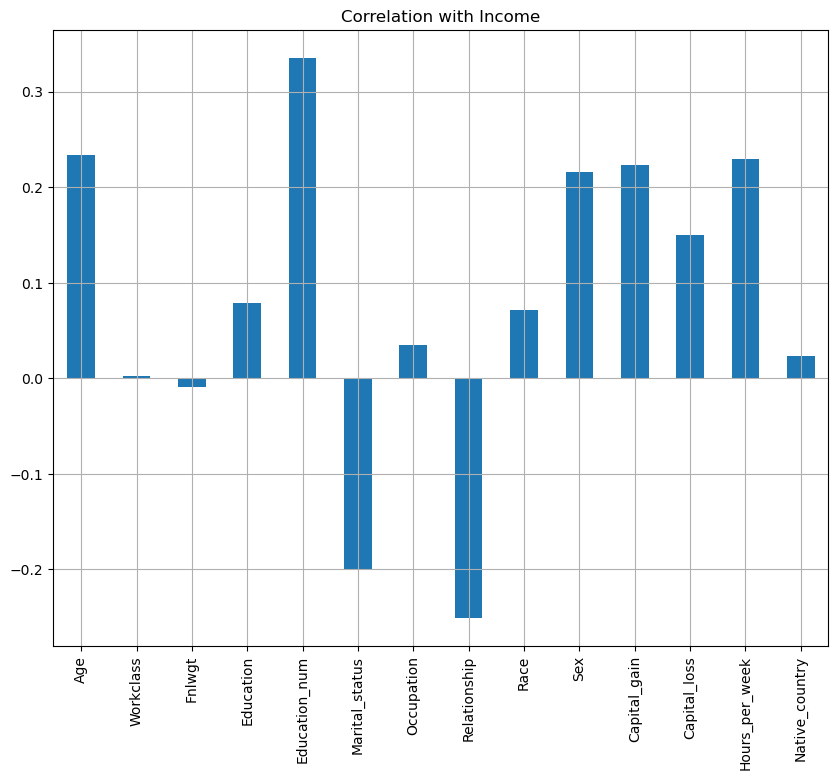

In [63]:
#Let's check the impact of each feature on the label(Income) graphically.
data.drop('Income', axis=1).corrwith(data.Income).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Income')
plt.show()

Clearly, Workclass and Fnlwgt are least contributors to income determination.

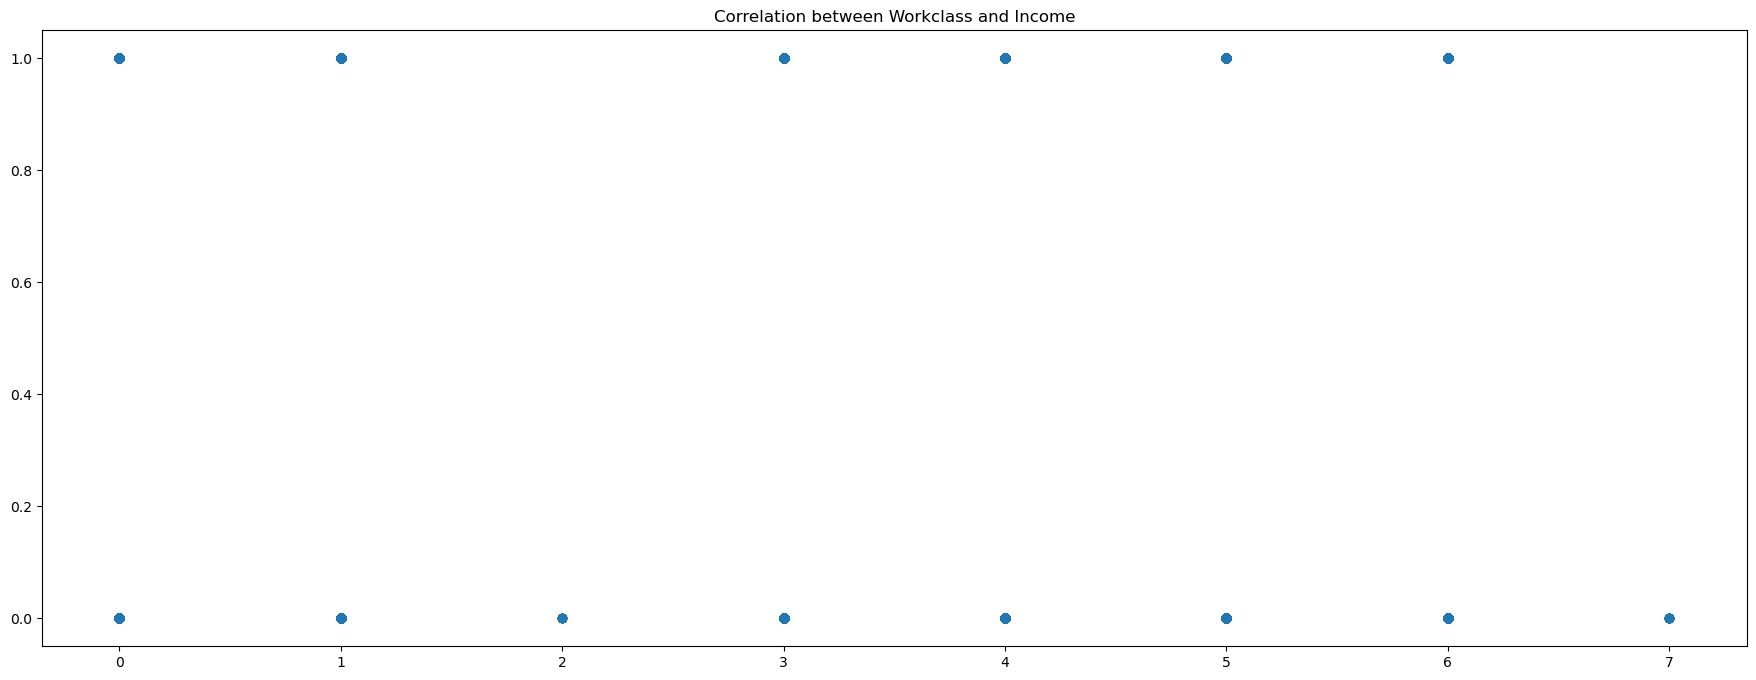

In [64]:
#Correlation between Workclass and Income
plt.figure(figsize=(22,8))
plt.scatter(x=data['Workclass'],y=data['Income'])
plt.title('Correlation between Workclass and Income')
plt.show()

Clearly, there is no/very low correlation

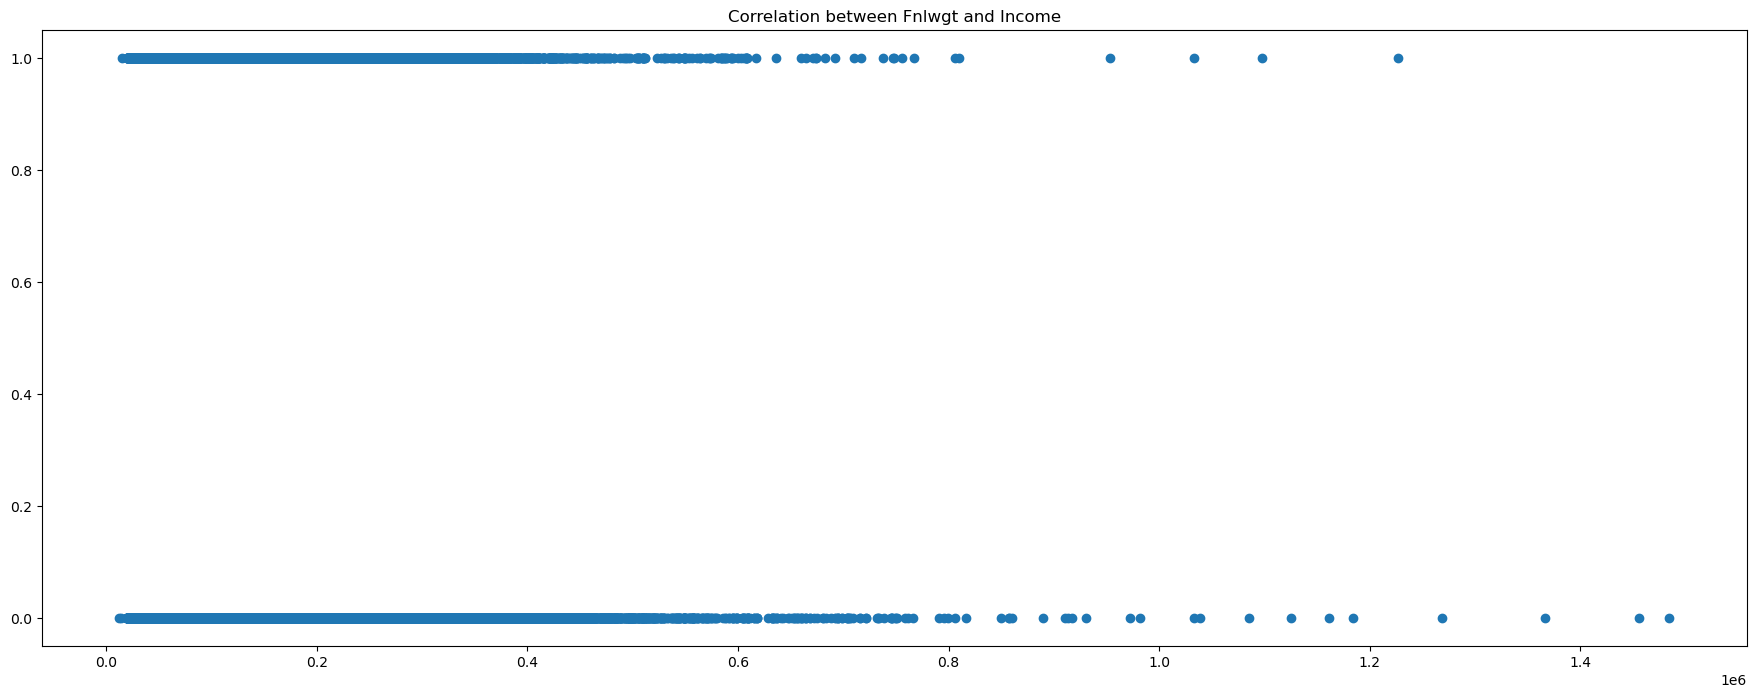

In [65]:
#Correlation between Fnlwgt and Income
plt.figure(figsize=(22,8))
plt.scatter(x=data['Fnlwgt'],y=data['Income'])
plt.title('Correlation between Fnlwgt and Income')
plt.show()

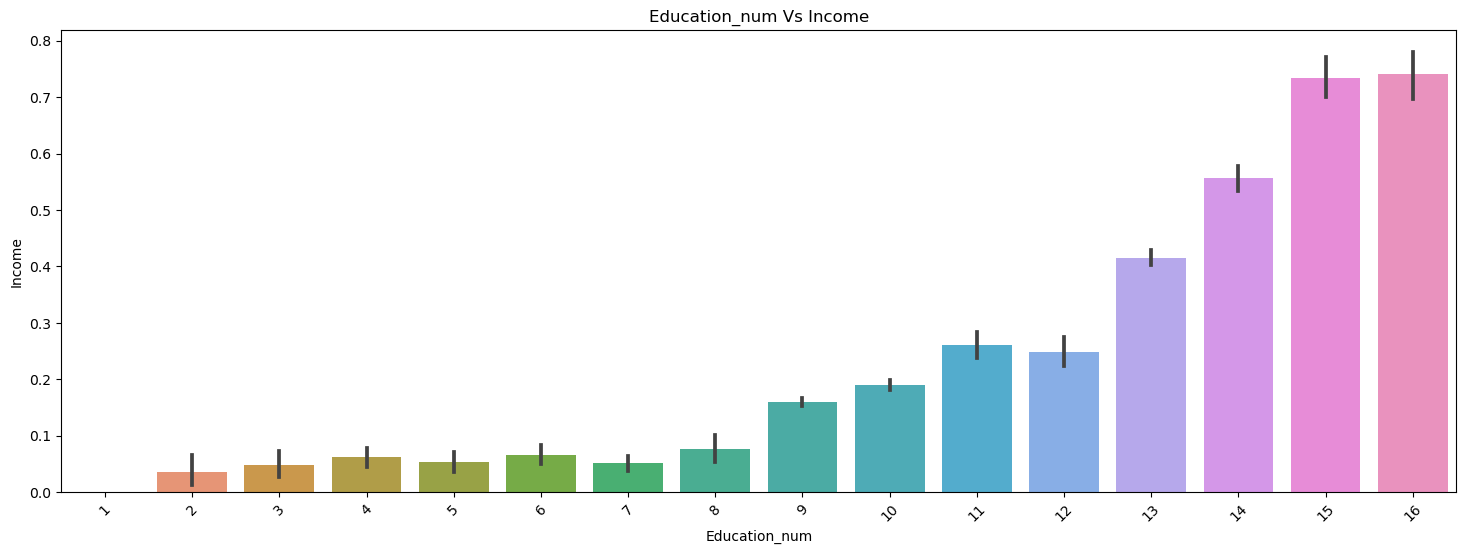

In [70]:
#Checking Education_num Vs Income
plt.figure(figsize=(18, 6))
sns.barplot(data=data, x="Education_num",y="Income")
plt.xticks(rotation=45)
plt.title("Education_num Vs Income")
plt.show()

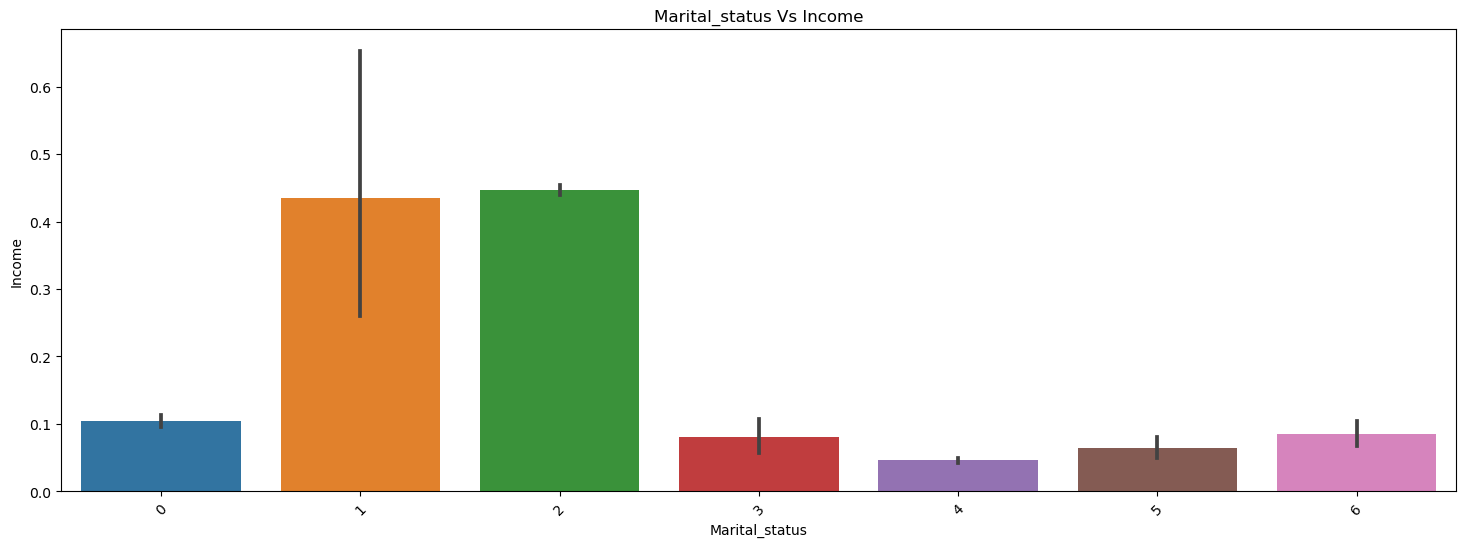

In [72]:
#Checking Marital_status Vs Income
plt.figure(figsize=(18, 6))
sns.barplot(data=data, x="Marital_status",y="Income")
plt.xticks(rotation=45)
plt.title("Marital_status Vs Income")
plt.show()

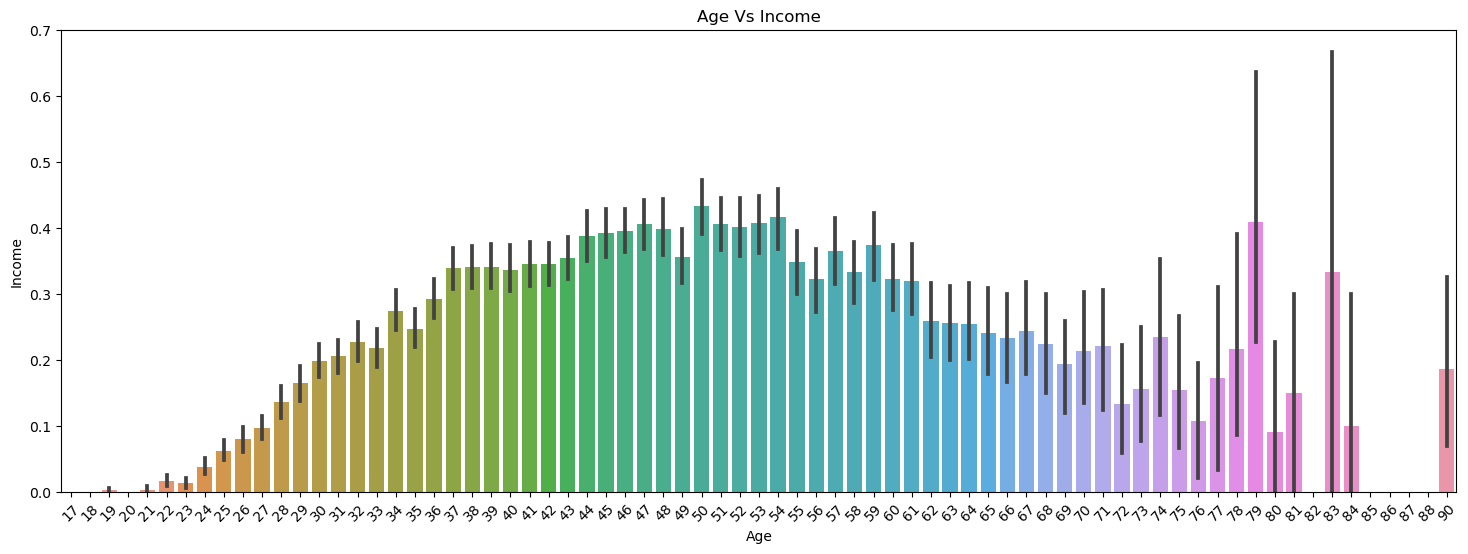

In [74]:
#Checking Age vs Income
plt.figure(figsize=(18, 6))
sns.barplot(data=data, x="Age",y="Income")
plt.xticks(rotation=45)
plt.title("Age Vs Income")
plt.show()

In [103]:
#Dropping irrelevant columns
data.drop(columns=['Workclass','Fnlwgt'],axis=1, inplace=True)

In [106]:
data.shape

(32560, 13)

In [107]:
#Handling outliers
from scipy.stats import zscore

In [108]:
z=np.abs(zscore(data))
abs_z_score=np.abs(z)
filt_ent=(abs_z_score<3).all(axis=1)
data=data[filt_ent]

In [109]:
data.shape

(28094, 13)

In [110]:
data.skew()

Age                0.487970
Education         -0.955307
Education_num     -0.148137
Marital_status    -0.047045
Occupation         0.015901
Relationship       0.751844
Race              -2.549513
Sex               -0.689828
Capital_gain       4.926969
Capital_loss      29.686789
Hours_per_week    -0.360363
Native_country    -5.341888
Income             1.323336
dtype: float64

In [111]:
#Let's remove skewness using PowerTrandsformer
from sklearn.preprocessing import PowerTransformer

In [112]:
scaler=PowerTransformer(method='yeo-johnson')

In [113]:
features=['Capital_gain','Capital_gain','Native_country']

In [114]:
data[features]=scaler.fit_transform(data[features].values)

In [115]:
data.skew()

Age                0.487970
Education         -0.955307
Education_num     -0.148137
Marital_status    -0.047045
Occupation         0.015901
Relationship       0.751844
Race              -2.549513
Sex               -0.689828
Capital_gain       3.067778
Capital_loss      29.686789
Hours_per_week    -0.360363
Native_country     1.671912
Income             1.323336
dtype: float64

In [116]:
#Separating features and label
X=data.drop(columns=['Income'], axis=1)
y=data['Income']

In [117]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 28094, dtype: int32

In [118]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [119]:
X_scaled=scaler.fit_transform(X)

In [120]:
X_scaled

array([[ 0.88732151, -0.34361224,  1.21355789, ..., -0.03699833,
        -2.41677715,  0.16162221],
       [-0.00912056,  0.17210442, -0.43890893, ..., -0.03699833,
         0.00714197,  0.16162221],
       [ 1.11143203, -2.40647887, -1.26514234, ..., -0.03699833,
         0.00714197,  0.16162221],
       ...,
       [ 1.48494956,  0.17210442, -0.43890893, ..., -0.03699833,
         0.00714197,  0.16162221],
       [-1.20437666,  0.17210442, -0.43890893, ..., -0.03699833,
        -1.78835367,  0.16162221],
       [ 1.03672853,  0.17210442, -0.43890893, ..., -0.03699833,
         0.00714197,  0.16162221]])

In [121]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.30, random_state=52)

In [123]:
y_train

27615    0
26966    1
22079    0
7895     1
29985    0
        ..
4932     0
27883    0
12759    0
11455    1
27259    0
Name: Income, Length: 19665, dtype: int32

In [124]:
#Handling imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE

In [125]:
Counter(data['Income'])

Counter({0: 21798, 1: 6296})

In [126]:
Counter(y_train)

Counter({0: 15247, 1: 4418})

In [127]:
over_smp=SMOTE(random_state=52, k_neighbors=3, sampling_strategy=0.70)

In [128]:
X_train_ns,y_train_ns= over_smp.fit_resample(X_train,y_train)

In [129]:
Counter(y_train_ns)

Counter({0: 15247, 1: 10672})

In [130]:
#Let's start with classification model first-
#Writing one function to call it for multiple models

def metric_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(X_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")

In [131]:
#Using Gradient Boosting
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [132]:
gbdt.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier()

In [133]:
metric_score(gbdt,X_train, X_test, y_train, y_test, train=True)
metric_score(gbdt,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:84.61%

---------------Test Result-------------
Accuracy Score:84.32%


In [134]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [135]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8621414543732024


 at 4, cross val score is 0.8623194317677971


 at 5, cross val score is 0.8620346050383016




In [136]:
#Using K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [137]:
knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [138]:
metric_score(knn,X_train, X_test, y_train, y_test, train=True)
metric_score(knn,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:86.68%

---------------Test Result-------------
Accuracy Score:79.45%


In [139]:
for k in range(3,6):
    cv_score=cross_val_score(knn,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8143732525857569


 at 4, cross val score is 0.8143732939232856


 at 5, cross val score is 0.8136258122346047




In [140]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [141]:
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [142]:
metric_score(rf,X_train, X_test, y_train, y_test, train=True)
metric_score(rf,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:96.63%

---------------Test Result-------------
Accuracy Score:82.92%


In [143]:
for k in range(3,6):
    cv_score=cross_val_score(rf,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8417455148323194


 at 4, cross val score is 0.8403575153084707


 at 5, cross val score is 0.8391827783107093




In [178]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [145]:
xgb.fit(X_train_ns,y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [146]:
metric_score(xgb,X_train, X_test, y_train, y_test, train=True)
metric_score(xgb,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:88.34%

---------------Test Result-------------
Accuracy Score:84.66%


In [147]:
for k in range(3,6):
    cv_score=cross_val_score(xgb,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.862782282210712


 at 4, cross val score is 0.8642772541295327


 at 5, cross val score is 0.8637076779687186




In [148]:
#Using SVC
from sklearn.svm import SVC
svc=SVC()

In [153]:
svc.fit(X_train_ns,y_train_ns)

SVC()

In [151]:
metric_score(svc,X_train, X_test, y_train, y_test, train=True)
metric_score(svc,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:81.27%

---------------Test Result-------------
Accuracy Score:81.17%


In [154]:
for k in range(3,6):
    cv_score=cross_val_score(svc,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8216701184476695


 at 4, cross val score is 0.8212786019220284


 at 5, cross val score is 0.8212785398368995




In [155]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [156]:
lr.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [157]:
metric_score(lr,X_train, X_test, y_train, y_test, train=True)
metric_score(lr,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:79.35%

---------------Test Result-------------
Accuracy Score:78.99%


In [158]:
for k in range(3,6):
    cv_score=cross_val_score(lr,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8201039388618542


 at 4, cross val score is 0.8202106720936773


 at 5, cross val score is 0.8185377626170578




We are getting the best accuracy score 84.34% with XGB Classifier model. The cross validation score at cv=4 is 86.4%.
Other model which is again performing well is GradientBoostingClassifier model with accuracy score of 84.32% however, XGB Classifier model has a higher score.
We can conclude that XGB Classifier model is the best fitted model as it works great on test data and has best CV score as well.

In [160]:
#Let's use hyperperameter tuning technique to stabilize model and to generalize it for unseen data.
from sklearn.model_selection import GridSearchCV

In [161]:
param_grid={'learning_rate':[0.1,0.2],
             'max_depth':[50,60,80],
             'n_estimators':[50,100],
            'criterion':['friedman_mse','squared_error']
            }

In [162]:
gridsearch=GridSearchCV(estimator=xgb, param_grid=param_grid, cv=4, n_jobs=1)

In [163]:
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2], 'max_depth': [50, 60, 80],
                         'n_estimators': [50, 100]})

In [164]:
gridsearch.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 50,
 'n_estimators': 100}

In [189]:
import xgboost as xgb
from xgboost import XGBClassifier

In [190]:
Final_model= XGBClassifier(criterion='friedman_mse', learning_rate= 0.1, max_depth=50, n_estimators=100)

In [191]:
Final_model.fit(X_train_ns,y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='friedman_mse', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [192]:
pred=Final_model.predict(X_test)

In [193]:
acc=accuracy_score(y_test,pred)
print(acc*100)

83.04662474789417


In [194]:
#Predicting Fraud reported
y_pred = Final_model.predict(X_test)
data_n = pd.DataFrame({'Actual' : y_test, 'XGB predicted': y_pred})

In [195]:
data_n

,Actual,XGB predicted
775,0,0
29886,0,0
16979,0,0
7138,0,0
9885,0,0
...,...,...
10487,0,0
31476,0,0
27498,1,1
17213,0,0
